# Support Vector Machines

This notebook shows the SVM model for the spambase data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import Timer, plot_learning_curve

In [3]:
df = pd.read_csv("spambase.csv")

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('class',axis=1))

scaled_features = scaler.transform(df.drop('class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.111546,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.111546,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222


### Modelling

1. Split dataset into training and test set

In [43]:
from sklearn.model_selection import train_test_split

# X = df.drop('class', axis=1)
X = scaled_features
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
# Set up timer
t = Timer()

## SVM

1. Default SVC model

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,roc_curve,roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score

t.start()
svc_base = SVC(C=1)
svc_base.fit(X_train, y_train)
y_pred_svc_base_train = svc_base.predict(X_train)
y_pred_svc_base_test = svc_base.predict(X_test)
t.stop()

accuracy_train = accuracy_score(y_train, y_pred_svc_base_train)
precision_train = precision_score(y_train, y_pred_svc_base_train)
recall_train = recall_score(y_train, y_pred_svc_base_train)
f1_train = f1_score(y_train, y_pred_svc_base_train)
roc_auc_train = roc_auc_score(y_train, y_pred_svc_base_train)

accuracy_test = accuracy_score(y_test, y_pred_svc_base_test)
precision_test = precision_score(y_test, y_pred_svc_base_test)
recall_test = recall_score(y_test, y_pred_svc_base_test)
f1_test = f1_score(y_test, y_pred_svc_base_test)
roc_auc_test = roc_auc_score(y_test, y_pred_svc_base_test)


print(f"Train Accuracy of SVC, C=1: {accuracy_train:.3f}")
print(f"Train Precision of SVC, C=1: {precision_train:.3f}")
print(f"Train Recall of SVC, C=1: {recall_train:.3f}")
print(f"Train F1 of SVC, C=1: {f1_train:.3f}")
print(f"Train ROC AUC of SVC, C=1: {roc_auc_train:.3f}")

print("---")
print(f"Test Accuracy of SVC, C=1: {accuracy_test:.3f}")
print(f"Test Precision of SVC, C=1: {precision_test:.3f}")
print(f"Test Recall of SVC, C=1: {recall_test:.3f}")
print(f"Test F1 of SVC, C=1: {f1_test:.3f}")
print(f"Test ROC AUC of SVC, C=1: {roc_auc_test:.3f}")

Elapsed time: 0.8192 seconds
Train Accuracy of SVC, C=1: 0.942
Train Precision of SVC, C=1: 0.944
Train Recall of SVC, C=1: 0.903
Train F1 of SVC, C=1: 0.923
Train ROC AUC of SVC, C=1: 0.935
---
Test Accuracy of SVC, C=1: 0.935
Test Precision of SVC, C=1: 0.945
Test Recall of SVC, C=1: 0.896
Test F1 of SVC, C=1: 0.920
Test ROC AUC of SVC, C=1: 0.929


Use Cross Validation for default model

In [46]:
from sklearn.model_selection import cross_validate,cross_val_predict

t.start()
svc_base_res_base = cross_validate(
      estimator=svc_base,
      X=X_train,
      y=y_train,
      cv=5,
      scoring=['accuracy', 'precision', 'recall', 'f1'],
      return_train_score=True
      )
t.stop()

Elapsed time: 2.2518 seconds


Collect mean of all scores

In [47]:
training_metrics = ["train_accuracy", "train_precision", "train_recall", "train_f1"]
testing_metrics = ["test_accuracy", "test_precision", "test_recall", "test_f1"]
for m in training_metrics:
    print(f"{m}: {np.mean(svc_base_res_base[m]):.3f}")
print("----")
for m in testing_metrics:
    print(f"{m}: {np.mean(svc_base_res_base[m]):.3f}")

train_accuracy: 0.943
train_precision: 0.945
train_recall: 0.903
train_f1: 0.924
----
test_accuracy: 0.927
test_precision: 0.928
test_recall: 0.877
test_f1: 0.902


Plot learning curve of default SVC

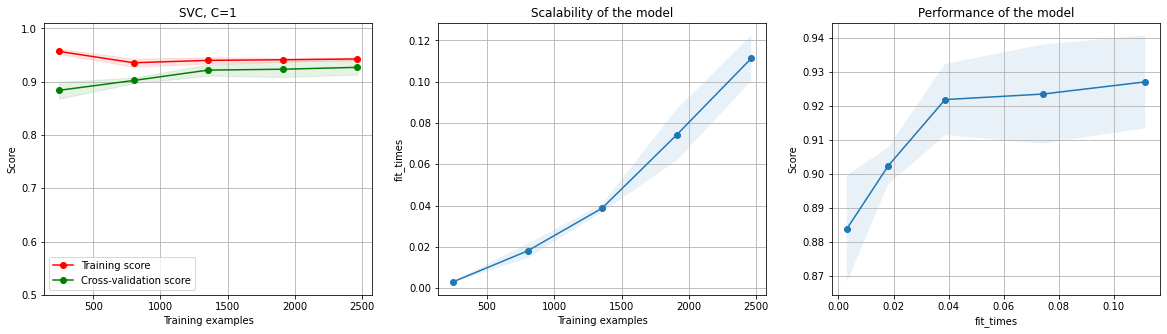

In [48]:
title = "SVC, C=1"
plot_learning_curve(
    svc_base, title, X_train, y_train, ylim=(0.5, 1.01), cv=5, n_jobs=4
)

plt.show()

In [49]:
y_pred_svc_base_train = cross_val_predict(svc_base, X_train, y_train, cv=5)
y_pred_svc_base_test = cross_val_predict(svc_base, X_test, y_test, cv=5)

accuracy_train = accuracy_score(y_train, y_pred_svc_base_train)
precision_train = precision_score(y_train, y_pred_svc_base_train)
recall_train = recall_score(y_train, y_pred_svc_base_train)
f1_train = f1_score(y_train, y_pred_svc_base_train)
roc_auc_train = roc_auc_score(y_train, y_pred_svc_base_train)

accuracy_test = accuracy_score(y_test, y_pred_svc_base_test)
precision_test = precision_score(y_test, y_pred_svc_base_test)
recall_test = recall_score(y_test, y_pred_svc_base_test)
f1_test = f1_score(y_test, y_pred_svc_base_test)
roc_auc_test = roc_auc_score(y_test, y_pred_svc_base_test)

print(f"Train Accuracy of SVC, C=1: {accuracy_train:.3f}")
print(f"Train Precision of SVC, C=1: {precision_train:.3f}")
print(f"Train Recall of SVC, C=1: {recall_train:.3f}")
print(f"Train F1 of SVC, C=1: {f1_train:.3f}")
print(f"Train ROC AUC of SVC, C=1: {roc_auc_train:.3f}")

print("---")
print(f"Test Accuracy of SVC, C=1: {accuracy_test:.3f}")
print(f"Test Precision of SVC, C=1: {precision_test:.3f}")
print(f"Test Recall of SVC, C=1: {recall_test:.3f}")
print(f"Test F1 of SVC, C=1: {f1_test:.3f}")
print(f"Test ROC AUC of SVC, C=1: {roc_auc_test:.3f}")

Train Accuracy of SVC, C=1: 0.927
Train Precision of SVC, C=1: 0.928
Train Recall of SVC, C=1: 0.877
Train F1 of SVC, C=1: 0.902
Train ROC AUC of SVC, C=1: 0.918
---
Test Accuracy of SVC, C=1: 0.932
Test Precision of SVC, C=1: 0.942
Test Recall of SVC, C=1: 0.893
Test F1 of SVC, C=1: 0.916
Test ROC AUC of SVC, C=1: 0.927


Perform a hyperparameter tuning

In [27]:
# Try with different kernels and C (reg parameter)
kernels = ["linear", "poly", "rbf", "sigmoid"]
regs = [0.0001, 0.001, 0.01, 0.1, 1]

In [28]:
hp_scores = {}
for k in kernels:
    for c in regs:
        hp_scores[f"{k},{c}"] = {}
        print(f"Training for {k}, {c}")
        svc = SVC(kernel = k, C=c)
        svc.fit(X_train, y_train)
        y_pred_train = svc.predict(X_train)
        y_pred_test = svc.predict(X_test)

        train_acc = accuracy_score(y_train,y_pred_train)
        train_precision = precision_score(y_train, y_pred_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_f1 = f1_score(y_train, y_pred_train)
        train_roc = roc_auc_score(y_train, y_pred_train)

        test_acc = accuracy_score(y_test,y_pred_test)
        test_precision = precision_score(y_test, y_pred_test)
        test_recall = recall_score(y_test, y_pred_test)
        test_f1 = f1_score(y_test, y_pred_test)
        test_roc = roc_auc_score(y_test, y_pred_test)
    
        hp_scores[f"{k},{c}"]["train_acc"] = train_acc
        hp_scores[f"{k},{c}"]["train_precision"] = train_precision
        hp_scores[f"{k},{c}"]["train_recall"] = train_recall
        hp_scores[f"{k},{c}"]["train_f1"] = train_f1
        hp_scores[f"{k},{c}"]["train_roc"] = train_roc

        hp_scores[f"{k},{c}"]["test_acc"] = test_acc
        hp_scores[f"{k},{c}"]["test_precision"] = test_precision
        hp_scores[f"{k},{c}"]["test_recall"] = test_recall
        hp_scores[f"{k},{c}"]["test_f1"] = test_f1
        hp_scores[f"{k},{c}"]["test_roc"] = test_roc

Training for linear, 0.0001
Training for linear, 0.001
Training for linear, 0.01
Training for linear, 0.1
Training for linear, 1
Training for poly, 0.0001
Training for poly, 0.001
Training for poly, 0.01
Training for poly, 0.1
Training for poly, 1
Training for rbf, 0.0001


/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training for rbf, 0.001


/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training for rbf, 0.01
Training for rbf, 0.1
Training for rbf, 1
Training for sigmoid, 0.0001


/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training for sigmoid, 0.001


/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training for sigmoid, 0.01
Training for sigmoid, 0.1
Training for sigmoid, 1


In [29]:
hp_scores_df = pd.DataFrame(hp_scores)

In [30]:
hp_scores_df.idxmax(axis=1)

train_acc                rbf,1
train_precision    poly,0.0001
train_recall             rbf,1
train_f1                 rbf,1
train_roc                rbf,1
test_acc                 rbf,1
test_precision     poly,0.0001
test_recall              rbf,1
test_f1                  rbf,1
test_roc                 rbf,1
dtype: object

In [31]:
lin_columns = [c for c in hp_scores_df.columns if c.startswith("linear,")]
poly_columns = [c for c in hp_scores_df.columns if c.startswith("poly,")]
rbf_columns = [c for c in hp_scores_df.columns if c.startswith("rbf,")]
sig_columns = [c for c in hp_scores_df.columns if c.startswith("sigmoid,")]

lin_roc_scores_test = hp_scores_df.loc["test_roc", lin_columns]
poly_roc_scores_test = hp_scores_df.loc["test_roc", poly_columns]
rbf_roc_scores_test = hp_scores_df.loc["test_roc", rbf_columns]
sig_roc_scores_test = hp_scores_df.loc["test_roc", sig_columns]

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

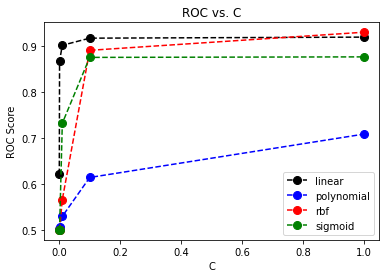

In [33]:
fig, ax = plt.subplots()

ax.plot(
    regs,
    lin_roc_scores_test,
    color='black', 
    linestyle='dashed', 
    marker='o',
    markerfacecolor='black', 
    markersize=8,
    label="linear"
)
ax.plot(
    regs,
    poly_roc_scores_test,
    color='blue', 
    linestyle='dashed', 
    marker='o',
    markerfacecolor='blue', 
    markersize=8,
    label="polynomial"
)
ax.plot(
    regs,
    rbf_roc_scores_test,
    color='red', 
    linestyle='dashed', 
    marker='o',
    markerfacecolor='red', 
    markersize=8,
    label="rbf"
)
ax.plot(
    regs,
    sig_roc_scores_test,
    color='green', 
    linestyle='dashed', 
    marker='o',
    markerfacecolor='green', 
    markersize=8,
    label="sigmoid"
)
plt.title('ROC vs. C')
plt.xlabel('C')
plt.ylabel('ROC Score')
plt.legend()
plt.xticks()

It seems that kernel=linear and C=0.001 provided the best scores. We will train the model again with these settings

Advanced model

In [51]:
t.start()
svc_adv = SVC(C=1, kernel="linear")
svc_adv.fit(X_train, y_train)
y_pred_svc_adv_train = svc_adv.predict(X_train)
y_pred_svc_adv_test = svc_adv.predict(X_test)
t.stop()

accuracy_train = accuracy_score(y_train, y_pred_svc_adv_train)
precision_train = precision_score(y_train, y_pred_svc_adv_train)
recall_train = recall_score(y_train, y_pred_svc_adv_train)
f1_train = f1_score(y_train, y_pred_svc_adv_train)
roc_auc_train = roc_auc_score(y_train, y_pred_svc_adv_train)

accuracy_test = accuracy_score(y_test, y_pred_svc_adv_test)
precision_test = precision_score(y_test, y_pred_svc_adv_test)
recall_test = recall_score(y_test, y_pred_svc_adv_test)
f1_test = f1_score(y_test, y_pred_svc_adv_test)
roc_auc_test = roc_auc_score(y_test, y_pred_svc_adv_test)

print(f"Train Accuracy of SVC, kernel=linear, C=0.001: {accuracy_train:.3f}")
print(f"Train Precision of SVC, kernel=linear, C=0.001: {precision_train:.3f}")
print(f"Train Recall of SVC, kernel=linear, C=0.001: {recall_train:.3f}")
print(f"Train F1 of SVC, kernel=linear, C=0.001: {f1_train:.3f}")
print(f"Train ROC AUC of SVC, kernel=linear, C=0.001: {roc_auc_train:.3f}")

print("---")
print(f"Test Accuracy of SVC, kernel=linear, C=0.001: {accuracy_test:.3f}")
print(f"Test Precision of SVC, kernel=linear, C=0.001: {precision_test:.3f}")
print(f"Test Recall of SVC, kernel=linear, C=0.001: {recall_test:.3f}")
print(f"Test F1 of SVC, kernel=linear, C=0.001: {f1_test:.3f}")
print(f"Test ROC AUC of SVC, kernel=linear, C=0.001: {roc_auc_test:.3f}")


Elapsed time: 0.4024 seconds
Train Accuracy of SVC, kernel=linear, C=0.001: 0.932
Train Precision of SVC, kernel=linear, C=0.001: 0.927
Train Recall of SVC, kernel=linear, C=0.001: 0.892
Train F1 of SVC, kernel=linear, C=0.001: 0.909
Train ROC AUC of SVC, kernel=linear, C=0.001: 0.924
---
Test Accuracy of SVC, kernel=linear, C=0.001: 0.924
Test Precision of SVC, kernel=linear, C=0.001: 0.930
Test Recall of SVC, kernel=linear, C=0.001: 0.885
Test F1 of SVC, kernel=linear, C=0.001: 0.907
Test ROC AUC of SVC, kernel=linear, C=0.001: 0.919


In [52]:
from sklearn.model_selection import cross_validate,cross_val_predict

t.start()
svc_base_res_adv = cross_validate(
      estimator=svc_adv,
      X=X_train,
      y=y_train,
      cv=5,
      scoring=['accuracy', 'precision', 'recall', 'f1'],
      return_train_score=True
      )
t.stop()

Elapsed time: 0.9725 seconds


In [53]:
for m in training_metrics:
    print(f"{m}: {np.mean(svc_base_res_adv[m]):.3f}")
print("----")
for m in testing_metrics:
    print(f"{m}: {np.mean(svc_base_res_adv[m]):.3f}")

train_accuracy: 0.932
train_precision: 0.929
train_recall: 0.892
train_f1: 0.910
----
test_accuracy: 0.927
test_precision: 0.918
test_recall: 0.888
test_f1: 0.903


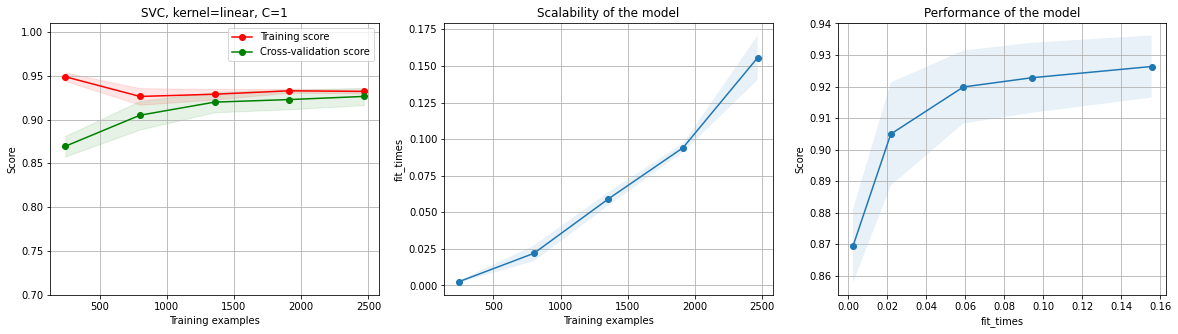

In [54]:
title = "SVC, kernel=linear, C=1"
plot_learning_curve(
    svc_adv, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=4
)

plt.show()

In [38]:
y_pred_svc_adv_train = cross_val_predict(svc_adv, X_train, y_train, cv=5)
y_pred_svc_adv_test = cross_val_predict(svc_adv, X_test, y_test, cv=5)

accuracy_train = accuracy_score(y_train, y_pred_svc_adv_train)
precision_train = precision_score(y_train, y_pred_svc_adv_train)
recall_train = recall_score(y_train, y_pred_svc_adv_train)
f1_train = f1_score(y_train, y_pred_svc_adv_train)
roc_auc_train = roc_auc_score(y_train, y_pred_svc_adv_train)

accuracy_test = accuracy_score(y_test, y_pred_svc_adv_test)
precision_test = precision_score(y_test, y_pred_svc_adv_test)
recall_test = recall_score(y_test, y_pred_svc_adv_test)
f1_test = f1_score(y_test, y_pred_svc_adv_test)
roc_auc_test = roc_auc_score(y_test, y_pred_svc_adv_test)

print(f"Train Accuracy of SVC, kernel=linear, C=0.001: {accuracy_train:.3f}")
print(f"Train Precision of SVC, kernel=linear, C=0.001: {precision_train:.3f}")
print(f"Train Recall of SVC, kernel=linear, C=0.001: {recall_train:.3f}")
print(f"Train F1 of SVC, kernel=linear, C=0.001: {f1_train:.3f}")
print(f"Train ROC AUC of SVC, kernel=linear, C=0.001: {roc_auc_train:.3f}")

print("---")
print(f"Test Accuracy of SVC, kernel=linear, C=0.001: {accuracy_test:.3f}")
print(f"Test Precision of SVC, kernel=linear, C=0.001: {precision_test:.3f}")
print(f"Test Recall of SVC, kernel=linear, C=0.001: {recall_test:.3f}")
print(f"Test F1 of SVC, kernel=linear, C=0.001: {f1_test:.3f}")
print(f"Test ROC AUC of SVC, kernel=linear, C=0.001: {roc_auc_test:.3f}")

Train Accuracy of SVC, kernel=linear, C=0.001: 0.887
Train Precision of SVC, kernel=linear, C=0.001: 0.866
Train Recall of SVC, kernel=linear, C=0.001: 0.833
Train F1 of SVC, kernel=linear, C=0.001: 0.849
Train ROC AUC of SVC, kernel=linear, C=0.001: 0.877
---
Test Accuracy of SVC, kernel=linear, C=0.001: 0.901
Test Precision of SVC, kernel=linear, C=0.001: 0.895
Test Recall of SVC, kernel=linear, C=0.001: 0.863
Test F1 of SVC, kernel=linear, C=0.001: 0.879
Test ROC AUC of SVC, kernel=linear, C=0.001: 0.895


In [55]:
y_pred_base_svc_train_f = svc_base.predict(X_train)
y_pred_adv_svc_train_f = svc_adv.predict(X_train)

accuracy_base_train = accuracy_score(y_train, y_pred_base_svc_train_f)
precision_base_train = precision_score(y_train, y_pred_base_svc_train_f)
recall_base_train = recall_score(y_train, y_pred_base_svc_train_f)
f1_base_train = f1_score(y_train, y_pred_base_svc_train_f)
roc_base_train = roc_auc_score(y_train, y_pred_base_svc_train_f)

accuracy_adv_train = accuracy_score(y_train, y_pred_adv_svc_train_f)
precision_adv_train = precision_score(y_train, y_pred_adv_svc_train_f)
recall_adv_train = recall_score(y_train, y_pred_adv_svc_train_f)
f1_adv_train = f1_score(y_train, y_pred_adv_svc_train_f)
roc_adv_train = roc_auc_score(y_train, y_pred_adv_svc_train_f)

y_pred_base_svc_test_f = svc_base.predict(X_test)
y_pred_adv_svc_test_f = svc_adv.predict(X_test)

accuracy_base_test = accuracy_score(y_test, y_pred_base_svc_test_f)
precision_base_test = precision_score(y_test, y_pred_base_svc_test_f)
recall_base_test = recall_score(y_test, y_pred_base_svc_test_f)
f1_base_test = f1_score(y_test, y_pred_base_svc_test_f)
roc_base_test = roc_auc_score(y_test, y_pred_base_svc_test_f)

accuracy_adv_test = accuracy_score(y_test, y_pred_adv_svc_test_f)
precision_adv_test = precision_score(y_test, y_pred_adv_svc_test_f)
recall_adv_test = recall_score(y_test, y_pred_adv_svc_test_f)
f1_adv_test = f1_score(y_test, y_pred_adv_svc_test_f)
roc_adv_test = roc_auc_score(y_test, y_pred_adv_svc_test_f)

In [56]:
print("Final - Training Set Performance")
print(f"Train Accuracy of Base SVC: {accuracy_base_train:.3f}")
print(f"Train Precision of Base SVC: {precision_base_train:.3f}")
print(f"Train Recall of Base SVC: {recall_base_train:.3f}")
print(f"Train F1 of Base SVC: {f1_base_train:.3f}")
print(f"Train ROC of Base SVC: {roc_base_train:.3f}")
print("-")
print(f"Train Accuracy of Adv SVC: {accuracy_adv_train:.3f}")
print(f"Train Precision of Adv SVC: {precision_adv_train:.3f}")
print(f"Train Recall of Adv SVC: {recall_adv_train:.3f}")
print(f"Train F1 of Adv SVC: {f1_adv_train:.3f}")
print(f"Train ROC of Adv SVC: {roc_adv_train:.3f}")

print("---")

print(f"Test Accuracy of Base SVC: {accuracy_base_test:.3f}")
print(f"Test Precision of Base SVC: {precision_base_test:.3f}")
print(f"Test Recall of Base SVC: {recall_base_test:.3f}")
print(f"Test F1 of Base SVC: {f1_base_test:.3f}")
print(f"Test ROC of Base SVC: {roc_base_test:.3f}")
print("-")
print(f"Test Accuracy of Adv SVC: {accuracy_adv_test:.3f}")
print(f"Test Precision of Adv SVC: {precision_adv_test:.3f}")
print(f"Test Recall of Adv SVC: {recall_adv_test:.3f}")
print(f"Test F1 of Adv SVC: {f1_adv_test:.3f}")
print(f"Test ROC of Adv SVC: {roc_adv_test:.3f}")

Final - Training Set Performance
Train Accuracy of Base SVC: 0.942
Train Precision of Base SVC: 0.944
Train Recall of Base SVC: 0.903
Train F1 of Base SVC: 0.923
Train ROC of Base SVC: 0.935
-
Train Accuracy of Adv SVC: 0.932
Train Precision of Adv SVC: 0.927
Train Recall of Adv SVC: 0.892
Train F1 of Adv SVC: 0.909
Train ROC of Adv SVC: 0.924
---
Test Accuracy of Base SVC: 0.935
Test Precision of Base SVC: 0.945
Test Recall of Base SVC: 0.896
Test F1 of Base SVC: 0.920
Test ROC of Base SVC: 0.929
-
Test Accuracy of Adv SVC: 0.924
Test Precision of Adv SVC: 0.930
Test Recall of Adv SVC: 0.885
Test F1 of Adv SVC: 0.907
Test ROC of Adv SVC: 0.919


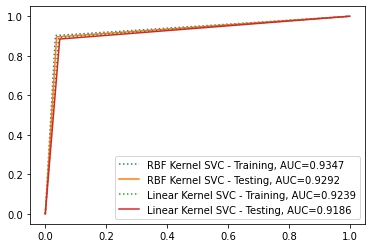

In [58]:
plt.figure(0).clf()

# Basic
fpr, tpr, _ = roc_curve(y_train, y_pred_base_svc_train_f)
auc = round(roc_auc_score(y_train, y_pred_base_svc_train_f), 4)
plt.plot(fpr,tpr,label="RBF Kernel SVC - Training, AUC="+str(auc), linestyle="dotted")

fpr, tpr, _ = roc_curve(y_test, y_pred_base_svc_test_f)
auc = round(roc_auc_score(y_test, y_pred_base_svc_test_f), 4)
plt.plot(fpr,tpr,label="RBF Kernel SVC - Testing, AUC="+str(auc), linestyle="solid")

# ADV

fpr, tpr, _ = roc_curve(y_train, y_pred_adv_svc_train_f)
auc = round(roc_auc_score(y_train, y_pred_adv_svc_train_f), 4)
plt.plot(fpr,tpr,label=f"Linear Kernel SVC - Training, AUC="+str(auc), linestyle="dotted")
plt.legend()

fpr, tpr, _ = roc_curve(y_test, y_pred_adv_svc_test_f)
auc = round(roc_auc_score(y_test, y_pred_adv_svc_test_f), 4)
plt.plot(fpr,tpr,label=f"Linear Kernel SVC - Testing, AUC="+str(auc), linestyle="solid")
plt.legend()